In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

from pmdarima import auto_arima

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('./data/df2.csv', index_col='DATE')

In [3]:
df.head()

,GVZCLS,VXGDXCLS,BAMLH0A0HYM2,sp500,gold_swing,gold_sc,gold_30
DATE,,,,,,,
2011-09-13,0.663332,0.346779,0.701012,0.035333,1.007752,0.880439,NaN
2011-09-14,0.609024,0.348379,0.694572,0.052700,0.994259,0.879714,NaN
2011-09-15,0.601470,0.343579,0.689052,0.068100,0.986711,0.862056,NaN
2011-09-16,0.589220,0.310821,0.686293,0.023000,1.008999,0.867862,NaN
2011-09-19,0.626786,0.306947,0.700092,-0.039733,0.987342,0.867862,NaN


In [4]:
df.columns

Index(['GVZCLS', 'VXGDXCLS', 'BAMLH0A0HYM2', 'sp500', 'gold_swing', 'gold_sc',
       'gold_30'],
      dtype='object')

In [5]:
adfuller(df['gold_sc'])

(-1.5061692242806803,
 0.5304573342823201,
 4,
 2442,
 {'1%': -3.4330306663366255,
  '5%': -2.862724291785039,
  '10%': -2.56740044647283},
 -17046.035729363037)

In [6]:
df['gold_sc']= df['gold_sc'].diff()
df['gold_30']= df['gold_30'].diff()
df.dropna(inplace=True)

In [7]:
adfuller(df['gold_sc'])

(-26.37188330778206,
 0.0,
 3,
 2413,
 {'1%': -3.433062917583076,
  '5%': -2.8627385335843085,
  '10%': -2.5674080290555596},
 -16869.303323621236)

In [8]:
adfuller(df['gold_30'])

(-8.490533358528777,
 1.317183601582038e-13,
 25,
 2391,
 {'1%': -3.4330879064776165,
  '5%': -2.8627495683023896,
  '10%': -2.567413904149833},
 -31486.406369605356)

In [9]:
adfuller(df['GVZCLS'])

(-4.778232056567874,
 5.9847665224170994e-05,
 3,
 2413,
 {'1%': -3.433062917583076,
  '5%': -2.8627385335843085,
  '10%': -2.5674080290555596},
 -11553.037564668373)

In [10]:
adfuller(df['GVZCLS'])

(-4.778232056567874,
 5.9847665224170994e-05,
 3,
 2413,
 {'1%': -3.433062917583076,
  '5%': -2.8627385335843085,
  '10%': -2.5674080290555596},
 -11553.037564668373)

In [11]:
adfuller(df['VXGDXCLS'])

(-4.151812489859072,
 0.0007942002060505967,
 7,
 2409,
 {'1%': -3.4330674270336785,
  '5%': -2.8627405248963482,
  '10%': -2.5674090892669166},
 -12169.814687646574)

In [12]:
adfuller(df['BAMLH0A0HYM2'])

(-3.329320875815072,
 0.013617633875989575,
 13,
 2403,
 {'1%': -3.4330742193886445,
  '5%': -2.8627435243022283,
  '10%': -2.567410686207021},
 -15840.786070369795)

In [13]:
adfuller(df['sp500'])

(-13.797898426816339,
 8.680421556968649e-26,
 12,
 2404,
 {'1%': -3.4330730849724276,
  '5%': -2.862743023360881,
  '10%': -2.5674104194963467},
 -4960.5679896111415)

In [14]:
adfuller(df['gold_swing'])

(-49.02186363403694,
 0.0,
 0,
 2416,
 {'1%': -3.43305954530467,
  '5%': -2.862737044430077,
  '10%': -2.5674072362026337},
 -17951.48365264544)

In [15]:
df.columns

Index(['GVZCLS', 'VXGDXCLS', 'BAMLH0A0HYM2', 'sp500', 'gold_swing', 'gold_sc',
       'gold_30'],
      dtype='object')

In [16]:
df.shape

(2417, 7)

In [17]:
#this was part of an effort to eliminate a syntax error. ultimately not needed.
#adj_df = df.asfreq('D')
#adj_df = df.fillna(method='ffill')
#endog = adj_df['gold_sc']
#exog = adj_df.drop(columns='gold_sc')

In [18]:
endog = df['gold_sc']
exog = df.drop(columns=['gold_sc','gold_30','gold_swing'])

In [19]:
exog_train, exog_test, endog_train, endog_test = train_test_split(exog,
                                                    endog,
                                                    test_size = 0.1,
                                                    shuffle=False)

In [20]:
auto_arima(endog, exogenous=exog, trace=True, mean=False).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-17055.804, Time=2.98 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-17061.447, Time=2.32 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-17059.453, Time=1.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-17059.455, Time=1.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-17062.917, Time=0.94 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-17057.458, Time=2.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 11.416 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2417
Model:                        SARIMAX   Log Likelihood                8536.459
Date:                Fri, 01 Oct 2021   AIC                         -17062.917
Time:                        07:36:26   BIC                         -17033.966
Sample:                             0   HQIC                        -17052.388
                               - 2417                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
GVZCLS          -0.0057      0.002     -3.125      0.002      -0.009      -0.002
VXGDXCLS         0.0003      0.002      0.149      0.881      -0.004       0.005
BAMLH0A0HYM2     0.0043      0.001      3.300      0.001       0.002       0.007
sp500            0.0088      0.001      9.948      0.000       0.007       0.010
sigma2         5.01e-05    7.9e-07     63.394      0.000    4.85e-05    5.16e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4811.15
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.42
Prob(H) (two-sided):                  0.12   Kurtosis:                         9.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

A PDQ of (0,0,0) means my model is hot garbage. I'll graph it to show.
While I would normally not fit the model to all data, it is not possible to do otherwise while using SARIMAX and exog variables.

In [21]:
sarimax1 = SARIMAX(endog, exog=exog, order=(0,0,0))
mod1 = sarimax1.fit(disp=True)
print(mod1.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                gold_sc   No. Observations:                 2417
Model:                        SARIMAX   Log Likelihood                8536.459
Date:                Fri, 01 Oct 2021   AIC                         -17062.917
Time:                        07:36:27   BIC                         -17033.966
Sample:                             0   HQIC                        -17052.388
                               - 2417                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
GVZCLS          -0.0057      0.002     -3.125      0.002      -0.009      -0.002
VXGDXCLS         0.0003      0.002      0.149      0.881      -0.004       0.005
BAMLH0A0HYM2     0.0043      0.001      3.30

In [22]:
train_preds = mod1.predict(start=endog_train.index[0], end=endog_train.index[-1], exog=exog_train)
test_preds = mod1.predict(start=endog_test.index[1], end=endog_test.index[-1],  exog=exog_test)

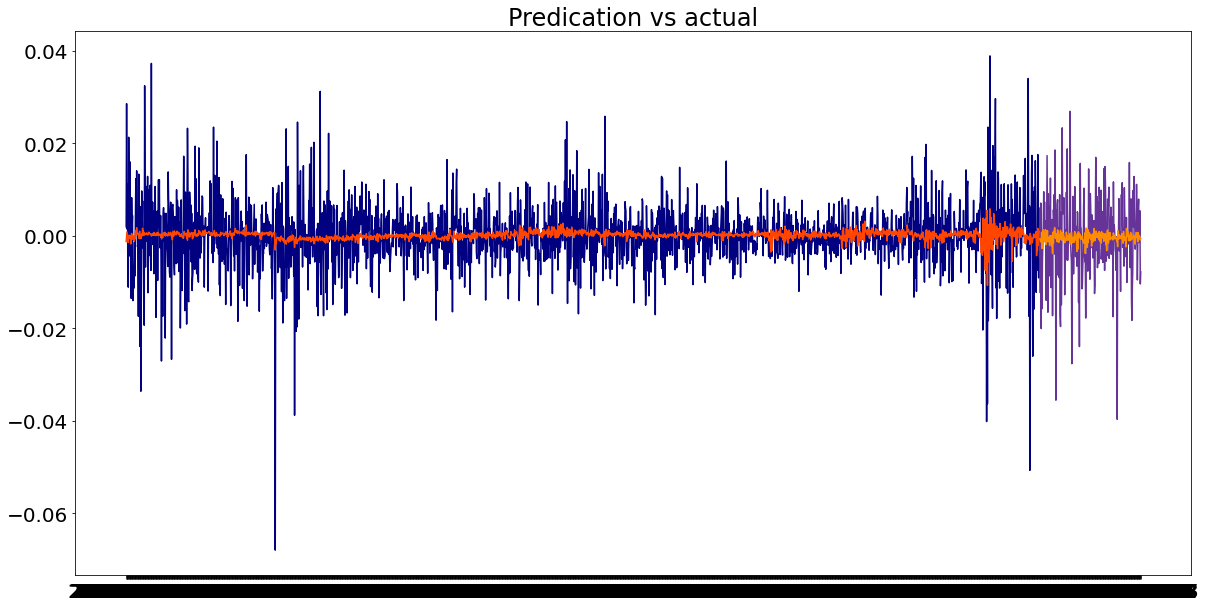

In [23]:
plt.figure(figsize=(20,10))
plt.plot(endog_train.index, endog_train.values, color = 'navy')
plt.plot(endog_test.index, endog_test.values, color = 'rebeccapurple')
plt.plot(train_preds, color = 'orangered')
plt.plot(test_preds, color = 'darkorange')
plt.title(label = 'Predication vs actual', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

0,0,0 model shows poor fit. Predictions are close to mean.

In [25]:
#https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (exog_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(exog_train, endog_train, epochs = 100, batch_size = 512)

Epoch 1/100


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 4]


In [26]:
exog.head()

,GVZCLS,VXGDXCLS,BAMLH0A0HYM2,sp500
DATE,,,,
2011-10-25,0.610862,0.379453,0.670653,-0.083800
2011-10-26,0.628624,0.361768,0.662374,0.043167
2011-10-27,0.563087,0.350653,0.628335,0.141967
2011-10-28,0.527562,0.344674,0.630175,0.001667
2011-10-31,0.560433,0.355284,0.650414,-0.105967
